In [3]:
import pandas as pd
from Meaner import Meaner
import matplotlib.pyplot as plt
import seaborn as sns

def get_missing_values_columns(col):
    null_values_column = []
    for column, count in col.items():
        if count >= 1:
            null_values_column.append(column)
    return null_values_column

In [4]:
# Input data
df = pd.read_csv('e.csv')

In [ ]:
# Display missing vales
print("Checking missing values...\n")
count_missing_values = df.isnull().sum()
missing_values_columns = get_missing_values_columns(count_missing_values)

meaner_instance = Meaner(df)
dict_col_mean_mode = {}

for val in missing_values_columns:
    mean_mode = meaner_instance.get_mean_mode(val)
    dict_col_mean_mode[val] = mean_mode

print(dict_col_mean_mode,"\n")

In [ ]:
#Populate missing values with mean or mode

for column, value in dict_col_mean_mode.items():
    df[column].fillna(value, inplace=True)

In [ ]:
#Re-check for missing values
print("Validate repopulation\n")
print(df.isnull().sum())

In [ ]:
# Supprimer les doublons
print("Checking duplicates...\n")
if df.drop_duplicates(inplace=True) is None:
    print("No duplicates found\n")
else:
    print("Duplicates found and deleted\n")

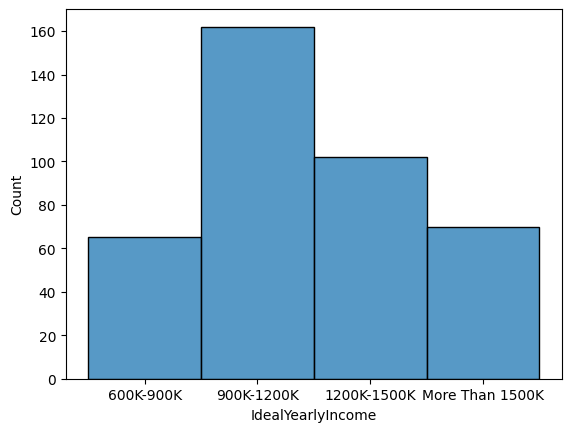

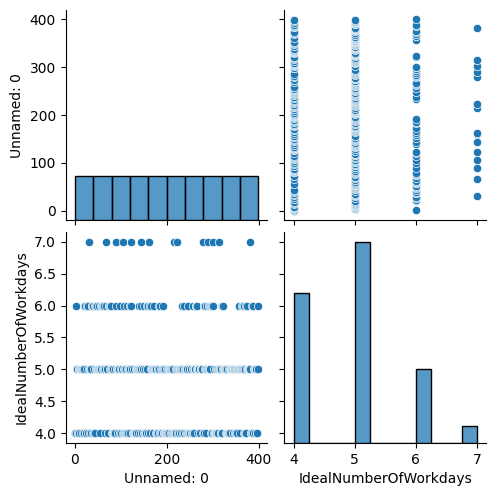

In [5]:
#Vizualize data

# Distribution des revenus idéaux
sns.histplot(df['IdealYearlyIncome'])
plt.show()

# Relations entre différentes variables
sns.pairplot(df)
plt.show()